In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [3]:
from skimage.feature import hog

def extract_features(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (128, 128))
    
    # Ekstrak HOG
    hog_features = hog(
        gray,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys',
        feature_vector=True
    )
    
    # Opsional: tambahkan fitur global
    mean_intensity = np.mean(gray)
    std_intensity = np.std(gray)
    
    # Gabungkan
    features = np.hstack([hog_features, mean_intensity, std_intensity])
    return features

In [4]:
data = []
labels = []

base = "dataset3/train"
classes = ["50", "100", "200", "500", "1000"]

# 1. Proses Pemuatan Data dan Ekstraksi Fitur
for cls in classes:
  folder = os.path.join(base, cls)
  for file in os.listdir(folder):
    path = os.path.join(folder, file)
    img = cv2.imread(path)
    if img is None:
      continue

    # Menggunakan fungsi extract_features yang didefinisikan sebelumnya
    feat = extract_features(img) 
    data.append(feat)
    labels.append(cls)

data = np.array(data)
labels = np.array(labels)

# ----------------------------------------------------
# 2. TAMBAHAN STATISTIK DATASET AWAL
# ----------------------------------------------------
from collections import Counter

print("### STATISTIK DATASET AWAL ###")
print(f"Total Sampel: {len(data)}")
print("Distribusi Kelas Awal:")
# Menghitung distribusi kelas (Counter(labels) akan menghasilkan: {'1000': 245, '500': 240, ...})
initial_counts = Counter(labels)
for cls in sorted(classes, key=int): # Mencetak berdasarkan urutan nominal
    count = initial_counts.get(cls, 0)
    print(f"- Kelas {cls}: {count} sampel")
print("-" * 30)

# 3. Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(
  data, labels, test_size=0.2, random_state=42, stratify=labels
)

# ----------------------------------------------------
# 4. TAMBAHAN STATISTIK PEMBAGIAN DATA
# ----------------------------------------------------
print("### STATISTIK PEMBAGIAN DATA ###")
print(f"Ukuran Data Latih (Training Set): {len(X_train)} sampel")
print(f"Ukuran Data Uji (Testing Set): {len(X_test)} sampel")

train_counts = Counter(y_train)
test_counts = Counter(y_test)

print("\nDistribusi Kelas (Data Latih):")
for cls in sorted(classes, key=int):
    print(f"- Kelas {cls}: {train_counts.get(cls, 0)} sampel")

print("\nDistribusi Kelas (Data Uji):")
for cls in sorted(classes, key=int):
    print(f"- Kelas {cls}: {test_counts.get(cls, 0)} sampel")
print("-" * 30)


# 5. Pelatihan dan Prediksi Model
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)

# 6. Hasil Evaluasi
print("\n### CLASSIFICATION REPORT (DATA UJI INTERNAL) ###")
print(classification_report(y_test, pred))

### STATISTIK DATASET AWAL ###
Total Sampel: 904
Distribusi Kelas Awal:
- Kelas 50: 28 sampel
- Kelas 100: 189 sampel
- Kelas 200: 201 sampel
- Kelas 500: 239 sampel
- Kelas 1000: 247 sampel
------------------------------
### STATISTIK PEMBAGIAN DATA ###
Ukuran Data Latih (Training Set): 723 sampel
Ukuran Data Uji (Testing Set): 181 sampel

Distribusi Kelas (Data Latih):
- Kelas 50: 22 sampel
- Kelas 100: 151 sampel
- Kelas 200: 161 sampel
- Kelas 500: 191 sampel
- Kelas 1000: 198 sampel

Distribusi Kelas (Data Uji):
- Kelas 50: 6 sampel
- Kelas 100: 38 sampel
- Kelas 200: 40 sampel
- Kelas 500: 48 sampel
- Kelas 1000: 49 sampel
------------------------------

### CLASSIFICATION REPORT (DATA UJI INTERNAL) ###
              precision    recall  f1-score   support

         100       0.65      0.34      0.45        38
        1000       0.61      0.76      0.67        49
         200       0.67      0.65      0.66        40
          50       1.00      0.67      0.80         6
         5

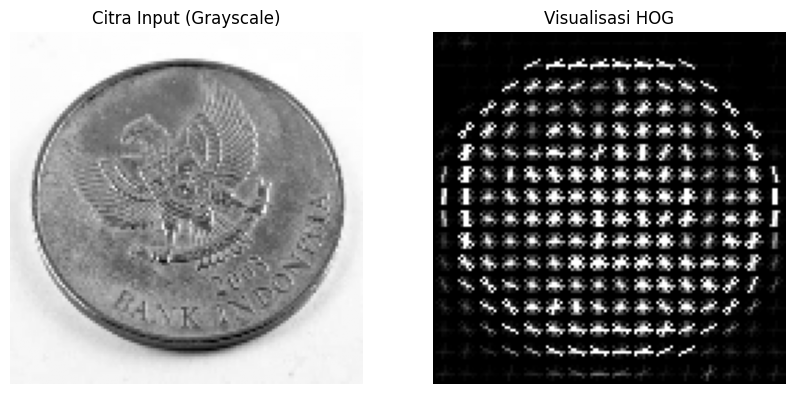

In [5]:
from skimage import exposure

# ----------------------------------------------------
# VISUALISASI HOG
# ----------------------------------------------------
# Ambil satu gambar sampel untuk visualisasi (misalnya dari kelas '500')
sample_path = os.path.join(base, "500", "dataset3/train/500/sIMG_E3192.JPG") # Ganti path sesuai struktur data Anda
# CATATAN: Karena 'base' didefinisikan di Cell 9, pastikan Anda menjalankannya jika menjalankan cell ini secara terpisah

# Untuk memastikan cell ini berjalan independen, kita bisa definisikan ulang base dan classes
base_vis = "dataset3/train" 
classes_vis = ["50", "100", "200", "500", "1000"]

# Ambil path gambar pertama yang tersedia dari kelas 500 sebagai contoh
sample_path = None
try:
    sample_dir = os.path.join(base_vis, "500")
    # Asumsikan 'dataset3/train/500' ada
    sample_files = os.listdir(sample_dir)
    if sample_files:
        sample_path = os.path.join(sample_dir, sample_files[0])
except Exception as e:
    # Fallback atau handle error jika path tidak ditemukan
    print(f"Error memuat path sampel untuk visualisasi: {e}. Pastikan 'dataset3/train/500' tersedia.")
    pass

if sample_path:
    img = cv2.imread(sample_path)
    if img is not None:
        # Konversi ke grayscale dan resize seperti di fungsi extract_features
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, (128, 128))
        
        # Ekstrak HOG, tetapi kali ini kita ingin visualisasinya (visualize=True)
        # Perlu mengimpor hog dari skimage.feature lagi jika cell ini dijalankan terpisah
        from skimage.feature import hog
        
        # Ekstrak HOG dengan visualize=True
        hog_features, hog_image = hog(
            gray,
            orientations=9,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            block_norm='L2-Hys',
            feature_vector=True,
            visualize=True # Penting untuk mendapatkan citra visualisasi
        )

        # Plot hasilnya
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

        ax1.axis('off')
        ax1.imshow(gray, cmap=plt.cm.gray)
        ax1.set_title('Citra Input (Grayscale)')

        # Rescale histogram of gradients for better visibility
        hog_image_rescaled = hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
        
        ax2.axis('off')
        ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
        ax2.set_title('Visualisasi HOG')

        plt.show()
        
    else:
        print(f"Gagal memuat gambar dari {sample_path}")
else:
    print("Gagal mendapatkan path gambar sampel untuk visualisasi HOG.")

In [6]:
import joblib
joblib.dump(model, "coin_rf.pkl")


['coin_rf.pkl']

In [7]:
correct = 0
total = 0

base = "dataset3/test"

for cls in classes:
  folder = os.path.join(base, cls)
  for file in os.listdir(folder):
    img = cv2.imread(os.path.join(folder, file))
    if img is None:
      continue

    feat = extract_features(img).reshape(1, -1)
    pred = model.predict(feat)[0]

    print(file, "=> pred:", pred, " | true:", cls)

    total += 1
    correct += (pred == cls)

print("\nAccuracy test folder:", correct / total)


IMG_50_000.jpg => pred: 50  | true: 50
IMG_50_001.jpg => pred: 50  | true: 50
IMG_50_002.jpg => pred: 50  | true: 50
IMG_50_003.jpg => pred: 50  | true: 50
IMG_100_000.jpg => pred: 100  | true: 100
IMG_100_001.jpg => pred: 100  | true: 100
IMG_100_002.jpg => pred: 100  | true: 100
IMG_100_003.jpg => pred: 100  | true: 100
IMG_200_000.jpg => pred: 200  | true: 200
IMG_200_001.jpg => pred: 100  | true: 200
IMG_200_002.jpg => pred: 200  | true: 200
IMG_200_003.jpg => pred: 200  | true: 200
IMG_500_000.jpg => pred: 500  | true: 500
IMG_500_001.jpg => pred: 500  | true: 500
IMG_500_002.jpg => pred: 500  | true: 500
IMG_500_003.jpg => pred: 1000  | true: 500
IMG_1000_000.jpg => pred: 1000  | true: 1000
IMG_1000_001.jpg => pred: 1000  | true: 1000
IMG_1000_002.jpg => pred: 1000  | true: 1000
IMG_1000_003.jpg => pred: 1000  | true: 1000

Accuracy test folder: 0.9


In [8]:
import gradio as gr
import cv2
import numpy as np
import joblib
from collections import Counter

# -----------------------------
# 2. DETEKSI KOIN
# -----------------------------
def detect_coins(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    morph = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel, iterations=2)

    cnts, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    circles = []
    for c in cnts:
        area = cv2.contourArea(c)
        if area < 2500:
            continue

        (x, y), r = cv2.minEnclosingCircle(c)
        circles.append((int(x), int(y), int(r)))

    return circles


# -----------------------------
# 3. DETEKSI DAN LABEL + CONFIDENCE
# -----------------------------
model = joblib.load("coin_rf.pkl")

# Pastikan label urut seperti saat training
# Misalnya: ['Rp 100', 'Rp 200', 'Rp 500', 'Rp 1000']
# Sesuaikan jika labelmu berbeda
# Sesuaikan dengan label aktual dari model (tanpa "Rp ")
coin_values = {
    '50': 50,
    '100': 100,
    '200': 200,
    '500': 500,
    '1000': 1000
}

def detect_and_label(image):
    if image is None:
        return None, ""

    img = image.copy()
    circles = detect_coins(img)

    predictions = []
    label_text = ""

    if not circles:
        label_text = "❌ Tidak ada koin terdeteksi."
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return img_rgb, label_text

    label_text += f"✅ Terdeteksi {len(circles)} koin\n\n"
    label_text += "Hasil Klasifikasi:\n"
    label_text += "-" * 40 + "\n\n"

    for i, (x, y, r) in enumerate(circles, 1):
        x1 = max(0, x - r)
        y1 = max(0, y - r)
        x2 = min(img.shape[1], x + r)
        y2 = min(img.shape[0], y + r)

        coin = img[y1:y2, x1:x2]
        if coin.size == 0:
            continue

        feat = extract_features(coin).reshape(1, -1)
        pred = model.predict(feat)[0]
        proba = model.predict_proba(feat)[0]

        classes = model.classes_
        prob_with_label = list(zip(classes, proba))
        prob_with_label.sort(key=lambda x: x[1], reverse=True)
        top3 = prob_with_label[:3]

        predictions.append(pred)

        label_text += f"Koin {i}: {pred}\n"
        label_text += "  Top 3 predictions:\n"
        for label, conf in top3:
            label_text += f"    {label:5} : {conf*100:6.1f}%\n"
        label_text += "\n"

    label_text += "=" * 40 + "\n\n"
    label_text += "Ringkasan:\n"

    counter = Counter(predictions)
    total_value = 0
    for coin, count in counter.items():
        nominal = coin_values.get(coin, 0)
        total_value += nominal * count
        label_text += f"- {coin}: {count}x = Rp {nominal * count:,}\n"

    label_text += f"\n💰 TOTAL NILAI: Rp {total_value:,}"

    # Gambar hasil
    for (x, y, r), pred in zip(circles, predictions):
        cv2.circle(img, (x, y), r, (0, 255, 0), 3)
        cv2.putText(img, pred, (x - r, y - r - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 3)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_rgb, label_text


# -----------------------------
# 4. GRADIO UI
# -----------------------------
with gr.Blocks() as demo:
    gr.Markdown("## Deteksi & Klasifikasi Koin Rupiah — RandomForest")

    with gr.Row():
        with gr.Column():
            inp = gr.Image(type="numpy", label="Upload Gambar")
            btn = gr.Button("Deteksi Koin")

        with gr.Column():
            out_img = gr.Image(type="numpy", label="Hasil Deteksi")
            out_text = gr.Textbox(label="Ringkasan Hasil", lines=15, max_lines=25)

    btn.click(detect_and_label, inputs=inp, outputs=[out_img, out_text])

demo.launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
